# 三维向量

- 三维绘图
- 三维向量
- 三维向量计算
  - 三维向量长度
  - 三维向量相加 (相减)
  - 三维向量和标量相乘
- 球坐标

## 1. 在三维坐标系绘图


**练习:** 绘制一个空的三维坐标系


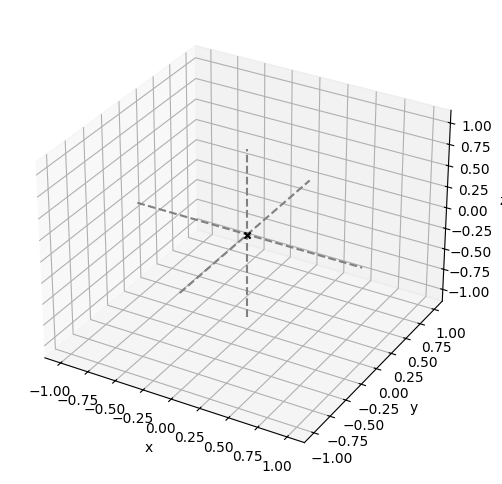

In [1]:
from utils.draw.component import draw3d

draw3d([])

**练习:** 在三维坐标系中绘制点

绘制 `(2, 2, 2)` 和 `(1, -2, -2)` 两个点


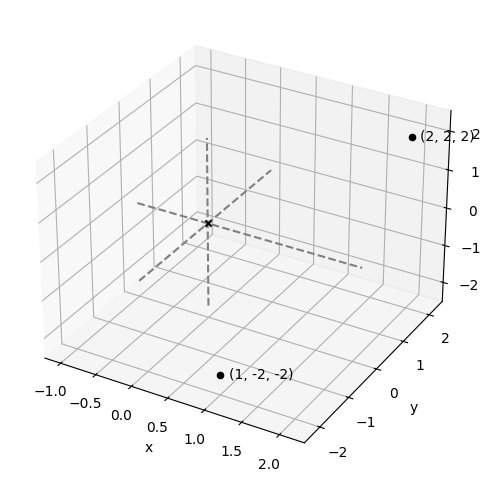

In [2]:
from utils.draw.component import Points3D, draw3d

# 两个点的坐标
v1, v2 = (2, 2, 2), (1, -2, -2)

# 绘制两个点
draw3d([Points3D([v1, v2])])

**练习:** 在三维坐标系中绘制点和线段

绘制 `(2, 2, 2)` 和 `(1, -2, -2)` 两个点, 并用线段连接, 最后用箭头从原点指向这两个点


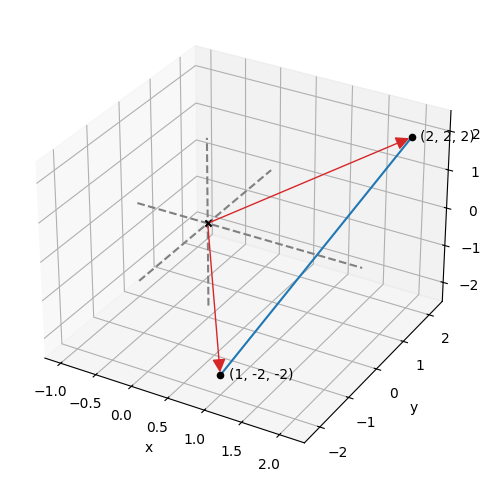

In [3]:
from utils.draw.component import Arrow3D, Points3D, Segment3D, draw3d

# 两个点的坐标
v1, v2 = (2, 2, 2), (1, -2, -2)

draw3d(
    [
        Points3D([v1, v2]),  # 绘制两个点
        Segment3D(v1, v2),  # 绘制连接两个点的线段
        Arrow3D(v1),  # 绘制原点到 v1 点的箭头
        Arrow3D(v2),
    ]  # 绘制原点到 v2 点的箭头
)

**练习:** 在三维坐标系中绘制点和线段, 并绘制坐标点和轴组成的立方体

绘制 `(2, 2, 2)` 和 `(1, -2, -2)` 两个点, 并用线段连接, 最后用箭头从原点指向这两个点


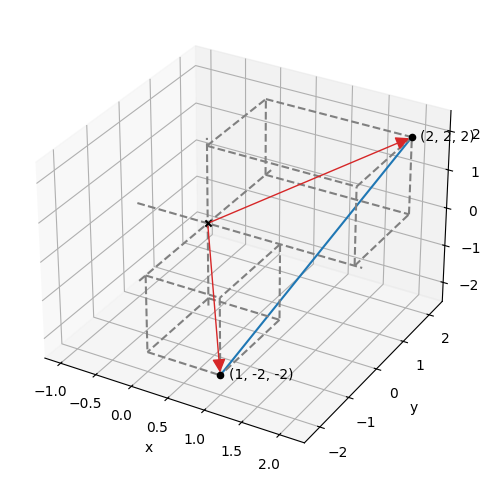

In [4]:
from utils.draw.component import Arrow3D, Box3D, Points3D, Segment3D, draw3d

# 两个点的坐标
v1, v2 = (2, 2, 2), (1, -2, -2)

draw3d(
    [
        Points3D([v1, v2]),  # 绘制两个点
        Segment3D(v1, v2),  # 绘制连接两个点的线段
        Arrow3D(v1),  # 绘制原点到 v1 点的箭头
        Arrow3D(v2),  # 绘制原点到 v2 点的箭头
        Box3D(v1),  # 绘制 v1 点和坐标轴组成的立方体
        Box3D(v2),  # 绘制 v2 点和坐标轴组成的立方体
    ]
)

**练习:** 绘制表示坐标 `(-1, -2, 2)` 的点和三维箭头, 以及使箭头更立体的虚线框


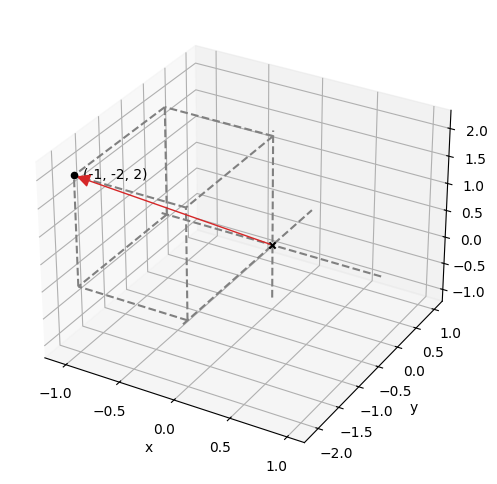

In [5]:
from utils.draw.component import Arrow3D, Box3D, Points3D, draw3d

# 要绘制的三维向量
v = (-1, -2, 2)

# 绘制图形
draw3d(
    [
        Points3D([v]),  # 绘制点
        Arrow3D(v),  # 绘制原点到坐标点的箭头
        Box3D(v),  # 绘制坐标点和坐标轴组成的立方体
    ]
)

**练习:** 有 `8` 个三维向量的坐标都是 `+1` 或 `-1`. 例如 `(1, -1, 1)` 就是其中之一. 将这 `8` 个向量绘制成点, 然后想办法通过线段将它们连接到一起, 以形成立方体的轮廓


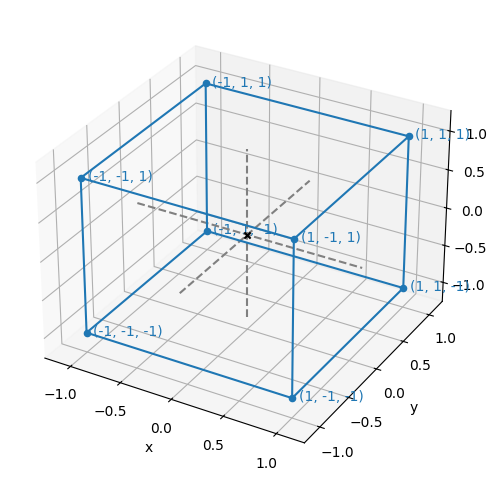

In [6]:
from utils.draw.component import Color, Points3D, Segment3D, draw3d

pm1 = [1, -1]

# 穷举 1, -1 两个数, 产生 8 个端点
# [
#   (1, 1, 1),
#   (1, 1, -1),
#   (1, -1, 1),
#   (1, -1, -1),
#   (-1, 1, 1),
#   (-1, 1, -1),
#   (-1, -1, 1),
#   (-1, -1, -1),
# ]
vertices = [(x, y, z) for x in pm1 for y in pm1 for z in pm1]

# 穷举 1, -1 两个数, 产生连接 8 个端点的 12 条线段
# 每组循环产生 4 组线段
# [
#   ((-1, 1, 1), (1, 1, 1)),
#   ((-1, 1, -1), (1, 1, -1)),
#   ((-1, -1, 1), (1, -1, 1)),
#   ((-1, -1, -1), (1, -1, -1)),
#   ((1, -1, 1), (1, 1, 1)),
#   ((1, -1, -1), (1, 1, -1)),
#   ((-1, -1, 1), (-1, 1, 1)),
#   ((-1, -1, -1), (-1, 1, -1)),
#   ((1, 1, -1), (1, 1, 1)),
#   ((1, -1, -1), (1, -1, 1)),
#   ((-1, 1, -1), (-1, 1, 1)),
#   ((-1, -1, -1), (-1, -1, 1)),
# ]
edges = (
    [((-1, y, z), (1, y, z)) for y in pm1 for z in pm1]
    + [((x, -1, z), (x, 1, z)) for x in pm1 for z in pm1]
    + [((x, y, -1), (x, y, 1)) for x in pm1 for y in pm1]
)

# 绘制图形
draw3d(
    [
        Points3D(vertices, color=Color.blue()),  # 绘制 8 个端点
        *(Segment3D(*edge) for edge in edges),  # 绘制 12 条线段
    ]
)

## 2. 3D 向量运算


### 2.1. 向量加法


**知识:** 两个 3D 向量相加仍是将向量的各个对应分量进行相加, 例如 `(2, 1, 1)` 和 `(1, 2, 2)` 相加为 `(2+1, 1+2, 1+2) = (3, 3, 3)`


In [7]:
from utils.vector import Vector


def add(*vs: Vector) -> Vector:
    """将一个 N 维向量集合中的所有向量进行相加后返回结果

    Args:
        `vs` (`*Vector`): 向量集合

    Returns:
        `Vector`: 所有向量相加后的结果
    """
    # 假设 vs = [(1, 2, 3), (4, 5, 6), (7, 8, 9)]
    # 则 zip(*vs) 为 [(1, 4, 7), (2, 5, 8), (3, 6, 9)], 相当于将 vs 按列排列
    # map(sum, zip(*vs)) 相当于将每个 tuple 相加
    return tuple(map(sum, zip(*vs)))

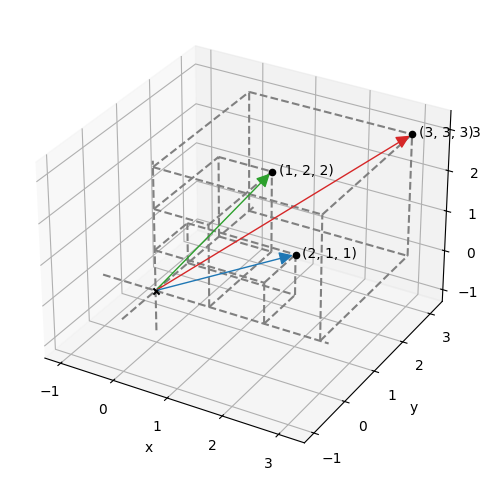

In [8]:
from utils.vector import add, as_vector3d
from utils.draw.component import Arrow3D, Box3D, Color, Points3D, draw3d

v1, v2 = (2, 1, 1), (1, 2, 2)

# 计算两个向量的和
vr = as_vector3d(add(v1, v2))

# 绘制向量
draw3d(
    [
        Points3D([v1, v2, vr]),
        Arrow3D(v1, color=Color.blue()),
        Arrow3D(v2, color=Color.green()),
        Arrow3D(vr, color=Color.red()),
        Box3D(v1),
        Box3D(v2),
        Box3D(vr),
    ]
)

三维向量相加, 从图形表示上, 相当于将被加的两个向量首尾相接, 即得到结果向量


**练习:** 绘制 `(4, 0, 3)` 和 `(-1, 0, 1)` 两个向量, 使它们在三维空间中以两种顺序首尾相接. 求向量和

结果图中, 红色和蓝色箭头首尾相接的结果即为向量和 (紫色箭头)

首尾相接表现了向量加法的交换律, 即 $(4, 0, 3) + (-1, 0, 1) = (-1, 0, 1) + (4, 0, 3) = (3, 0, 4)$

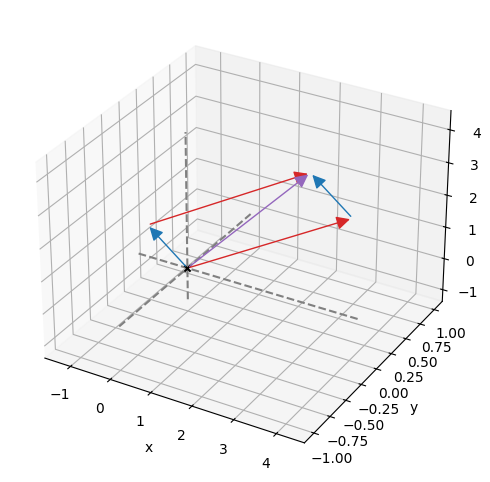

In [9]:
from utils.vector import add, as_vector3d
from utils.draw.component import Arrow3D, Color, Points3D, draw3d

# 两个向量
v1, v2 = (4, 0, 3), (-1, 0, 1)

# 两个向量的和
vr = as_vector3d(add(v1, v2))

# 绘制图形
draw3d(
    [
        Arrow3D(v1, color=Color.red()),  # 向量 1
        Arrow3D(v2, color=Color.blue()),  # 向量 2
        Arrow3D(  # 从向量 1 到向量和, 表示向量 1 和向量 2 首位相接
            vr, v1, color=Color.blue()
        ),
        Arrow3D(  # 从向量 2 到向量和, 表示向量 2 和向量 1 首位相接
            vr, v2, color=Color.red()
        ),
        Arrow3D(vr, color=Color.purple()),  # 向量和
    ]
)

**练习:** 一个包含 `24` 个向量的列表 `[(sin(pi * t / 6), cos(pi * t / 6), 1.0 / 3) for t in range(0,24)]`

求: 这 `24` 个向量的和是多少? 把这 `24` 个向量绘制成首尾相接的图形

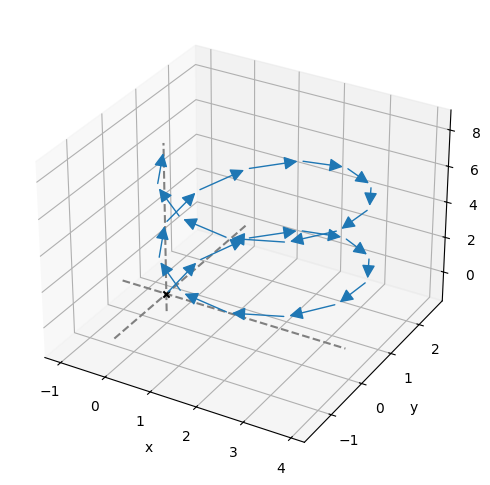

(-4.440892098500626e-16, -7.771561172376096e-16, 7.9999999999999964)


In [10]:
import math

from utils.vector import add, as_vector3d
from utils.draw.component import Arrow3D, Color, draw3d

# 预设的向量集合
vs = [
    as_vector3d((math.sin(math.pi * t / 6), math.cos(math.pi * t / 6), 1.0 / 3))
    for t in range(0, 24)
]

# 保存箭头图形的列表
arrows = []

# 保存向量和的向量
vr = (0, 0, 0)

# 遍历所有向量
for v in vs:
    # 计算当前向量和之前向量的总和
    next_vr = as_vector3d(add(vr, v))
    # 产生从当前当前向量和到前一个向量和之间的箭头
    arrows.append(Arrow3D(next_vr, vr, color=Color.blue()))
    vr = next_vr

# 绘制向量
draw3d(arrows)

# 输出向量和
print(vr)

### 2.2. 标量乘法


**知识:** 三维向量 $v = (1, 2, 3)$ 乘以标量 `2` 的结果为 $vr = (2, 4, 6)$, 结果向量和原向量方向一致, 长度为之前的 `2` 倍


In [11]:
from utils.typedef import Number, Vector

def scale(scalar: Number, v: Vector) -> Vector:
    """二维向量和标量相乘

    Args:
        `scalar` (`Number`): 乘数, 即向量的放大倍数
        `v` (`Vector`): N 维向量

    Returns:
        `Vector`: 缩放后的向量
    """
    return tuple(coord * scalar for coord in v)


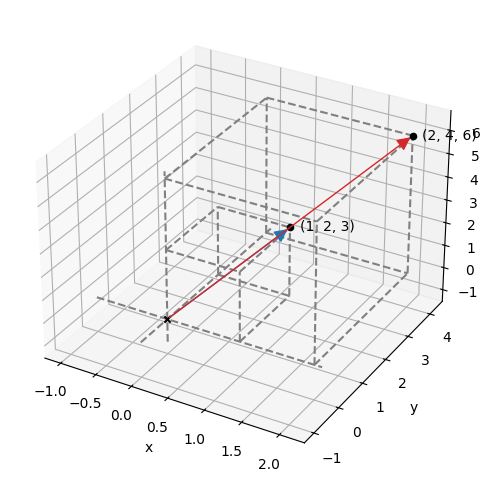

In [12]:
from utils.vector import as_vector3d, scale
from utils.draw.component import Arrow3D, Box3D, Color, Points3D, draw3d

v = (1, 2, 3)

# 计算向量和标量的乘积
vr = as_vector3d(scale(2, v))

# 绘制向量
draw3d(
    [
        Points3D([v, vr]),
        Arrow3D(v, color=Color.blue()),
        Arrow3D(vr, color=Color.red()),
        Box3D(v),
        Box3D(vr),
    ]
)

### 2.3. 向量减法


**知识:** 两个三维向量 $v$ 和 $w$ 相减, 称为**位移**, 将 $v$ 和 $w$ 看作从原点出发的箭头, 那么 $v - w$ 的差值也是一个箭头，它的头部位于 $v$ 的头部，尾部位于 $w$ 的头部, 它既是 $v$ 到 $w$ 的箭头, 本身也是一个点

计算 $v1 = (-1, -3, 3)$ 和 $v2 = (3, 2, 4)$ 的差值


In [13]:
from typing import Iterable

from utils.vector import Number, Vector


def subtract(*vs: Vector) -> Vector:
    """将一个 N 维向量集合中所有的向量进行相减后返回结果

    Args:
        `vs` (`Iterable[Vector]`): 向量集合

    Returns:
        `Vector`: 所有向量相减后的结果
    """

    def sub(nums: Iterable[Number]) -> Number:
        it = iter(nums)

        r = next(it)
        while 1:
            try:
                r -= next(it)
            except StopIteration:
                break

        return r

    # 假设 vs = [(1, 2, 3), (4, 5, 6), (7, 8, 9)]
    # 则 zip(*vs) 为 [(1, 4, 7), (2, 5, 8), (3, 6, 9)], 相当于将 vs 按列排列
    # map(sum, zip(*vs)) 相当于将每个 tuple 相减
    return tuple(map(sub, zip(*vs)))

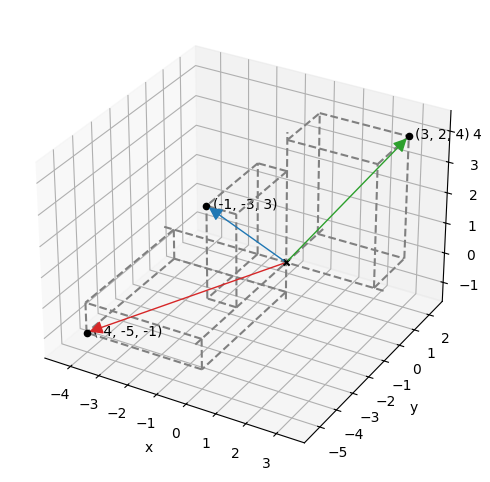

In [14]:
from utils.vector import as_vector3d, subtract
from utils.draw.component import Arrow3D, Box3D, Color, Points3D, draw3d

v1, v2 = (-1, -3, 3), (3, 2, 4)

# 计算两个向量的差
vr = as_vector3d(subtract(v1, v2))

# 绘制向量
draw3d(
    [
        Points3D([v1, v2, vr]),
        Arrow3D(v1, color=Color.blue()),
        Arrow3D(v2, color=Color.green()),
        Arrow3D(vr, color=Color.red()),
        Box3D(v1),
        Box3D(v2),
        Box3D(vr),
    ]
)

**练习:** 设 $u = (1, -1, -1)$ 和 $v = (0, 0, 2)$. 则 $u + 1/2(v - u)$ 的结果是什么?

可以看到, 计算结果 `(0.5, -0.5, 0.5)` 恰好在两个向量的坐标点之间

Result is: (0.5, -0.5, 0.5)


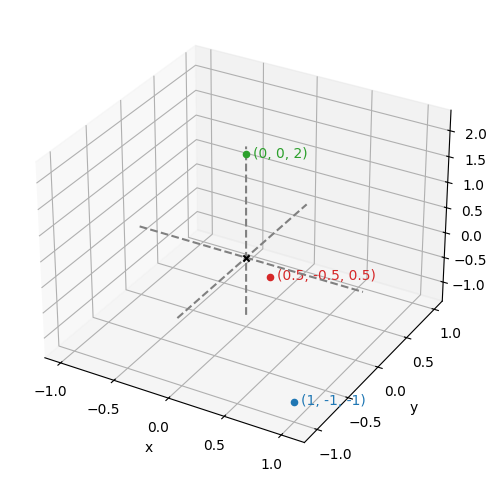

In [15]:
from utils.vector import add, as_vector3d, subtract, scale
from utils.draw.component import Color, Points3D, draw3d

u, v = (1, -1, -1), (0, 0, 2)

# 计算结果
vr = as_vector3d(subtract(v, u))
vr = as_vector3d(scale(1 / 2, vr))
vr = as_vector3d(add(u, vr))

print(f"Result is: {vr}")

# 绘制图形
draw3d(
    [
        Points3D([u], color=Color.blue()),  # 绘制向量 u
        Points3D([v], color=Color.green()),  # 绘制向量 v
        Points3D([vr], color=Color.red()),  # 绘制计算结果向量
    ]
)

### 2.3. 三维向量长度

**知识:** 三维向量长度和二维向量类似, 只是额外需要考虑 `z` 坐标

计算公式为: $\sqrt{(\sqrt{x^2 + y^2})^2 + z^2} = \sqrt{x^2 + y^2 + z^2}$

In [16]:
import math

from utils.vector import Vector


def length(v: Vector) -> float:
    """计算一个 N 维向量的长度

    Args:
        `v` (`Vector`): 一个 N 维向量

    Returns:
        `float`: 向量长度
    """
    return math.sqrt(sum(coord**2 for coord in v))


length((3, 4, 12))

13.0

**练习:** 坐标 `3`, `4` 和 `12` 能以任意顺序创建一个向量, 其长度是整数 `13`. 这很不寻常, 因为大多数数不是完全平方数, 所以长度公式中的平方根通常返回无理数. 找出另一组三个整数, 以它们为坐标定义的向量也有整数长度.

In [17]:
from typing import Iterable

from utils.vector import Vector3D, length


def vectors_with_whole_number_length(max_coord=100) -> Iterable[Vector3D]:
    """计算在一个坐标值范围内, 长度为整数的向量

    Args:
        `max_coord` (`int`, optional): 最大坐标范围. Defaults to `100`.

    Yields:
        `Iterable[Vector3D]`: 符合条件的向量集合
    """
    for x in range(1, max_coord):
        for y in range(1, x + 1):
            for z in range(1, y + 1):  # 穷举三个坐标轴的
                coord = (x, y, z)
                # 判断向量长度是否为整数
                if length(coord).is_integer():
                    yield coord


list(vectors_with_whole_number_length())

[(2, 2, 1),
 (4, 4, 2),
 (6, 3, 2),
 (6, 6, 3),
 (7, 4, 4),
 (7, 6, 6),
 (8, 4, 1),
 (8, 8, 4),
 (9, 6, 2),
 (10, 10, 5),
 (11, 10, 2),
 (12, 4, 3),
 (12, 6, 4),
 (12, 9, 8),
 (12, 12, 1),
 (12, 12, 6),
 (14, 5, 2),
 (14, 8, 8),
 (14, 12, 12),
 (14, 14, 7),
 (15, 10, 6),
 (16, 8, 2),
 (16, 11, 8),
 (16, 13, 4),
 (16, 15, 12),
 (16, 16, 8),
 (17, 6, 6),
 (18, 6, 1),
 (18, 9, 6),
 (18, 12, 4),
 (18, 13, 6),
 (18, 14, 3),
 (18, 18, 9),
 (19, 8, 4),
 (20, 5, 4),
 (20, 12, 9),
 (20, 20, 10),
 (20, 20, 17),
 (21, 12, 12),
 (21, 16, 12),
 (21, 18, 14),
 (21, 18, 18),
 (22, 6, 3),
 (22, 14, 7),
 (22, 20, 4),
 (22, 21, 6),
 (22, 22, 11),
 (23, 10, 10),
 (23, 14, 2),
 (24, 8, 6),
 (24, 12, 3),
 (24, 12, 8),
 (24, 12, 11),
 (24, 16, 3),
 (24, 18, 16),
 (24, 24, 2),
 (24, 24, 12),
 (24, 24, 23),
 (25, 10, 2),
 (25, 20, 8),
 (26, 7, 2),
 (26, 18, 15),
 (26, 22, 19),
 (26, 26, 13),
 (27, 14, 6),
 (27, 18, 6),
 (27, 24, 8),
 (28, 10, 4),
 (28, 16, 7),
 (28, 16, 16),
 (28, 17, 4),
 (28, 21, 12),
 (28,

**练习:** 找到一个与 `(-1, -1, 2)` 方向相同但长度为 `1` 的向量

提示：找到合适的标量与原向量相乘，以适当地改变其长度

Length is: <function length at 0x7a04c1795bc0>
1/length is: 0.4082482904638631
New vector is: (-0.4082482904638631, -0.4082482904638631, 0.8164965809277261)


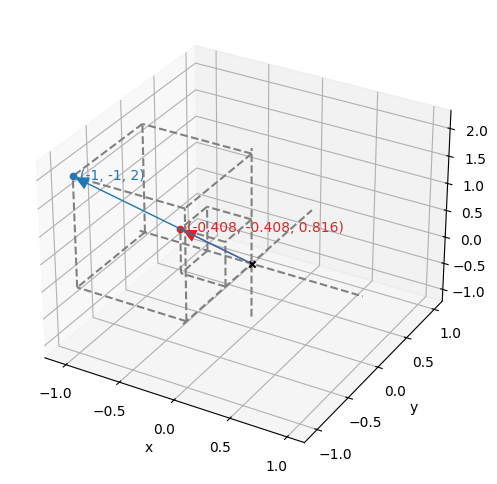

In [18]:
from utils.vector import as_vector3d, length, scale
from utils.draw.component import Arrow3D, Box3D, Color, Points3D, draw3d

# 原始向量
v = (-1, -1, 2)

# 求原始向量的长度
len = length(v)
print(f"Length is: {length}")

# 求新向量和原始向量长度的比例
s = 1 / len
print(f"1/length is: {s}")

# 利用向量和标量的乘法, 计算新向量
v_new = as_vector3d(scale(s, v))
print(f"New vector is: {v_new}")

# 绘制向量
draw3d(
    [
        Points3D([v], color=Color.blue()),
        Points3D([v_new], color=Color.red()),
        Arrow3D(v, color=Color.blue()),
        Arrow3D(v_new, color=Color.red()),
        Box3D(v),
        Box3D(v_new),
    ]
)

## 球坐标

**知识:** 通过角度和长度确定三维向量

三维向量可以被看作箭头或者沿一定方向发生的一定长度的位移. 在三维空间中, 需要通过两个角度来确定向量的方向
- 第一个角度 $\phi$ 为向量和 $x$ 轴正方向的夹角
- 第一个角度 $\theta$ 为向量和 $z$ 轴正方向的夹角

![两个角度共同指定三维向量的方向](../.assets/spherical_coords.jpeg)

向量的长度用 $r$ 来表示，它与角度 $\phi$ 和 $\theta$ 一起可以描述三维空间中的任何向量. $r$, $\phi$ 和 $\theta$ 这三个数组成了球坐标系